In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [53]:
l = 10
k = 5
d1 = 3
d2 = l - d1
m = 4

v0 = 0
x0 = 2
dt = 0.001

In [54]:
xi, vi, f1i, f2i, ti = [], [], [], [], np.arange(0, 10, dt)

In [55]:
x = x0
v = v0
for t in ti:
    f1 = -k*(x-d1)
    f2 = -k*(d2-x)
    fw = f1 - f2
    a = fw/m
    v += a*dt
    x += v*dt
    xi.append(x)
    f1i.append(f1)
    f2i.append(f2)
    vi.append(v)

In [56]:
def get_color(f, fmax, fmin):
    if f > 0:
        return (1-f/fmax, 0.5*(1 - f/fmax), 0)
    else:
        return (1, 1-f/fmin, 0)

In [64]:
fig, ax = plt.subplots()
fmax = max(max(f1i), max(f2i))
fmin = min(min(f1i), min(f2i))
def animate(i):
    ax.clear()
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 10)
    ax.scatter(xi[i], 0, c='b')
    ax.plot([0, xi[i]], [0, 0], c=get_color(f1i[i], fmax, fmin))
    ax.plot([xi[i], l], [0, 0], c=get_color(f2i[i], fmax, fmin))
ani = animation.FuncAnimation(fig, animate, frames=range(0, len(ti), len(ti)//100))
ani.save('plots/01-spring.gif', writer='pillow')
plt.close()

Text(0, 0.5, 'v')

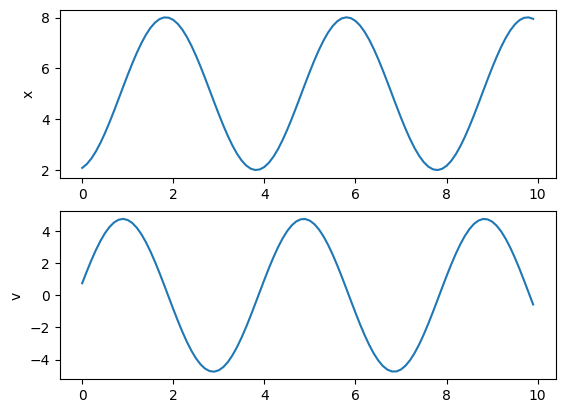

In [ ]:
fig, axs = plt.subplots(2,1)
axs[0].plot(ti, xi)
axs[1].plot(ti, vi)
axs[0].set_ylabel("x")
axs[1].set_ylabel("v")